In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

SAVE_PATH = './regensburg_pediatric_appendicitis.csv'  

try:
    data = pd.read_csv(SAVE_PATH)
except:
    from ucimlrepo import fetch_ucirepo 
    regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
    data = regensburg_pediatric_appendicitis['data']['features']
    data.to_csv(SAVE_PATH, index=False)


# One hot encode

In [2]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

display(data_encoded)

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,...,Gynecological_Findings_Ovarialzyste,Gynecological_Findings_Ovarialzyste re.,Gynecological_Findings_Ovarialzysten,Gynecological_Findings_V. a. Ovarialtorsion,Gynecological_Findings_Zyste Uterus,Gynecological_Findings_ja,Gynecological_Findings_kein Anhalt für eine gynäkologische Ursache der Beschwerden,Gynecological_Findings_keine,Gynecological_Findings_kleine Ovarzyste rechts,Gynecological_Findings_unauffällig
0,12.68,16.90,148.0,37.0,3.0,4.0,3.0,7.1,37.0,7.7,...,False,False,False,False,False,False,False,False,False,False
1,14.10,31.90,147.0,69.5,2.0,5.0,4.0,NaN,36.9,8.1,...,False,False,False,False,False,False,False,False,False,False
2,14.14,23.30,163.0,62.0,4.0,5.0,3.0,NaN,36.6,13.2,...,False,False,False,False,False,False,False,False,False,False
3,16.37,20.60,165.0,56.0,3.0,7.0,6.0,NaN,36.0,11.4,...,False,False,False,False,False,False,False,False,False,False
4,11.08,16.90,163.0,45.0,3.0,5.0,6.0,7.0,36.9,8.1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,166.5,70.0,4.0,8.0,7.0,7.5,39.4,11.4,...,False,False,False,False,False,False,False,False,False,False
778,17.09,20.43,158.0,51.0,6.0,5.0,3.0,NaN,37.8,17.4,...,False,False,False,False,False,False,False,False,False,False
779,14.99,19.91,152.0,46.0,4.0,5.0,3.0,NaN,37.3,14.6,...,False,False,False,False,False,False,False,False,False,True
780,7.20,14.30,129.3,23.9,5.0,9.0,8.0,14.0,37.5,17.8,...,False,False,False,False,False,False,False,False,False,False


# Variable Selection

Numerical Variables

Index(['Age', 'BMI', 'Height', 'Weight', 'Length_of_Stay', 'Alvarado_Score',
       'Paedriatic_Appendicitis_Score', 'Appendix_Diameter',
       'Body_Temperature', 'WBC_Count', 'Neutrophil_Percentage',
       'Segmented_Neutrophils', 'RBC_Count', 'Hemoglobin', 'RDW',
       'Thrombocyte_Count', 'CRP'],
      dtype='object')

<Axes: ylabel='Density'>

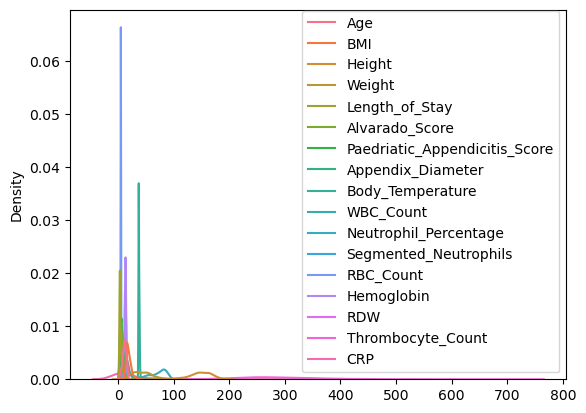

In [3]:
numerical_features = data_encoded.select_dtypes(include=['float64', 'int64']).columns
display(numerical_features)

sns.kdeplot(data=data_encoded[numerical_features], label = numerical_features)


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 

all_data = pd.concat([X, y], axis=1)
display(all_data)
display(y)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Management,Severity,Diagnosis
0,12.68,16.90,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conservative,uncomplicated,appendicitis
1,14.10,31.90,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,conservative,uncomplicated,no appendicitis
2,14.14,23.30,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,yes,yes,NaN,conservative,uncomplicated,no appendicitis
3,16.37,20.60,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,no appendicitis
4,11.08,16.90,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,conservative,uncomplicated,appendicitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,female,166.5,70.0,4.0,8.0,7.0,yes,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,primary surgical,uncomplicated,appendicitis
778,17.09,20.43,female,158.0,51.0,6.0,5.0,3.0,no,NaN,...,yes,yes,NaN,NaN,NaN,NaN,NaN,secondary surgical,complicated,appendicitis
779,14.99,19.91,female,152.0,46.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,unauffällig,primary surgical,uncomplicated,appendicitis
780,7.20,14.30,male,129.3,23.9,5.0,9.0,8.0,yes,14.0,...,yes,NaN,no,NaN,NaN,NaN,NaN,primary surgical,uncomplicated,appendicitis


,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis
...,...,...,...
777,primary surgical,uncomplicated,appendicitis
778,secondary surgical,complicated,appendicitis
779,primary surgical,uncomplicated,appendicitis
780,primary surgical,uncomplicated,appendicitis


In [5]:
#Not normally distributed -- Use Mann-Whitney U test
from scipy.stats import mannwhitneyu

#first see if it's signifigant in terms of diagnosis variable
data_encoded.columns

appendicitis = all_data[all_data['Diagnosis'] == "appendicitis"]
no_appendicitis = all_data[all_data['Diagnosis'] == "no appendicitis"]
len(appendicitis), len(no_appendicitis)

appendicitis = appendicitis[numerical_features]
no_appendicitis = no_appendicitis[numerical_features]


results = []
for feat in numerical_features:
    #temperarily drop NA values
    appendicitis = appendicitis.dropna(subset=[feat])
    no_appendicitis = no_appendicitis.dropna(subset=[feat])
    if len(appendicitis) == 0 or len(no_appendicitis) == 0:
        continue
    t_test = mannwhitneyu(appendicitis[feat], no_appendicitis[feat], alternative="two-sided")
    results.append([feat, t_test.statistic, t_test.pvalue])

num_feat_diagnosis = pd.DataFrame(results, columns=["feature", "statistic", "pvalue"])
display(num_feat_diagnosis)

#bonfroni correction
signifigance = 0.05 / len(numerical_features)
display(signifigance)

num_feat_diagnosis = num_feat_diagnosis[num_feat_diagnosis['pvalue'] < signifigance]
num_feat_diagnosis

,feature,statistic,pvalue
0,Age,65900.5,1.545085e-02
1,BMI,58344.5,3.169961e-04
2,Height,63669.5,7.291833e-02
3,Weight,60020.5,2.428008e-03
4,Length_of_Stay,106349.5,1.266094e-41
5,Alvarado_Score,89690.5,2.108374e-28
6,Paedriatic_Appendicitis_Score,84649.0,4.363695e-20
7,Appendix_Diameter,39363.0,1.708849e-49
8,Body_Temperature,25740.5,6.376481e-05
9,WBC_Count,31394.5,2.640302e-17


0.0029411764705882353

,feature,statistic,pvalue
1,BMI,58344.5,3.169961e-04
3,Weight,60020.5,2.428008e-03
4,Length_of_Stay,106349.5,1.266094e-41
5,Alvarado_Score,89690.5,2.108374e-28
6,Paedriatic_Appendicitis_Score,84649.0,4.363695e-20
7,Appendix_Diameter,39363.0,1.708849e-49
8,Body_Temperature,25740.5,6.376481e-05
9,WBC_Count,31394.5,2.640302e-17
10,Neutrophil_Percentage,26156.0,5.295038e-15


In [6]:
unique_management = all_data['Management'].unique()
print(unique_management)


['conservative' nan 'primary surgical' 'secondary surgical'
 'simultaneous appendectomy']


In [7]:
#Same thing but now predicting the other targets
from scipy.stats import kruskal

#management
conservative = all_data[all_data['Management'] == "conservative"]
primary_surgical = all_data[all_data['Management'] == "primary surgical"]
secondary_surgical = all_data[all_data['Management'] == "secondary surgical"]
simultaneous_appendectomy = all_data[all_data['Management'] == "simultaneous appendectomy"]
len(conservative), len(primary_surgical), len(secondary_surgical), len(simultaneous_appendectomy)

conservative = conservative[numerical_features]
primary_surgical = primary_surgical[numerical_features]
secondary_surgical = secondary_surgical[numerical_features]
simultaneous_appendectomy = simultaneous_appendectomy[numerical_features]
len(conservative), len(primary_surgical), len(secondary_surgical), len(simultaneous_appendectomy)
#we won't use simultaneous appendectomy because there's only 1 value

results = []
for feat in numerical_features:
    #temperarily drop NA values
    conservative = conservative.dropna(subset=[feat])
    primary_surgical = primary_surgical.dropna(subset=[feat])
    secondary_surgical = secondary_surgical.dropna(subset=[feat])
    if len(conservative) == 0 or len(primary_surgical) == 0 or len(secondary_surgical) == 0:
        continue
    t_test = kruskal(conservative[feat], primary_surgical[feat], secondary_surgical[feat])
    results.append([feat, t_test.statistic, t_test.pvalue])

num_feat_management = pd.DataFrame(results, columns=["feature", "statistic", "pvalue"])
display(num_feat_management)

#bonfroni correction
signifigance = 0.05 / len(numerical_features)
display(signifigance)

num_feat_management = num_feat_management[num_feat_management['pvalue'] < signifigance]
num_feat_management

,feature,statistic,pvalue
0,Age,27.238371,1.216922e-06
1,BMI,15.631009,4.034313e-04
2,Height,15.683100,3.930593e-04
3,Weight,18.854354,8.050613e-05
4,Length_of_Stay,453.947348,2.670459e-99
5,Alvarado_Score,124.883524,7.618812e-28
6,Paedriatic_Appendicitis_Score,69.215519,9.333425e-16
7,Appendix_Diameter,120.733048,6.069485e-27
8,Body_Temperature,36.980209,9.329313e-09
9,WBC_Count,72.377256,1.920784e-16


0.0029411764705882353

,feature,statistic,pvalue
0,Age,27.238371,1.216922e-06
1,BMI,15.631009,4.034313e-04
2,Height,15.683100,3.930593e-04
3,Weight,18.854354,8.050613e-05
4,Length_of_Stay,453.947348,2.670459e-99
5,Alvarado_Score,124.883524,7.618812e-28
6,Paedriatic_Appendicitis_Score,69.215519,9.333425e-16
7,Appendix_Diameter,120.733048,6.069485e-27
8,Body_Temperature,36.980209,9.329313e-09
9,WBC_Count,72.377256,1.920784e-16


In [8]:
#severity
unique_severity = all_data['Severity'].unique()
print(unique_severity)

complicated = all_data[all_data['Severity'] == "complicated"]
uncomplicated = all_data[all_data['Severity'] == "uncomplicated"]
display(len(complicated), len(uncomplicated))

complicated = complicated[numerical_features]
uncomplicated = uncomplicated[numerical_features]


results = []
for feat in numerical_features:
    #temperarily drop NA values
    complicated = complicated.dropna(subset=[feat])
    uncomplicated = uncomplicated.dropna(subset=[feat])
    if len(complicated) == 0 or len(uncomplicated) == 0:
        continue
    t_test = mannwhitneyu(complicated[feat], uncomplicated[feat], alternative="two-sided")
    results.append([feat, t_test.statistic, t_test.pvalue])

num_feat_severity = pd.DataFrame(results, columns=["feature", "statistic", "pvalue"])
display(num_feat_severity)

#bonfroni correction
signifigance = 0.05 / len(numerical_features)
display(signifigance)

num_feat_severity = num_feat_severity[num_feat_severity['pvalue'] < signifigance]
num_feat_severity

['uncomplicated' nan 'complicated']


119

662

,feature,statistic,pvalue
0,Age,30675.5,1.203041e-04
1,BMI,28751.5,2.852429e-04
2,Height,29348.0,8.063669e-04
3,Weight,28154.0,9.343678e-05
4,Length_of_Stay,69243.5,2.310138e-58
5,Alvarado_Score,45647.5,2.560330e-16
6,Paedriatic_Appendicitis_Score,43044.0,8.767622e-12
7,Appendix_Diameter,17844.5,6.216328e-10
8,Body_Temperature,17173.0,4.185907e-08
9,WBC_Count,17406.5,1.086295e-08


0.0029411764705882353

,feature,statistic,pvalue
0,Age,30675.5,1.203041e-04
1,BMI,28751.5,2.852429e-04
2,Height,29348.0,8.063669e-04
3,Weight,28154.0,9.343678e-05
4,Length_of_Stay,69243.5,2.310138e-58
5,Alvarado_Score,45647.5,2.560330e-16
6,Paedriatic_Appendicitis_Score,43044.0,8.767622e-12
7,Appendix_Diameter,17844.5,6.216328e-10
8,Body_Temperature,17173.0,4.185907e-08
9,WBC_Count,17406.5,1.086295e-08


Now for categotrical features

In [20]:
# find all the categorical features
non_numerical_features = all_data.columns.difference(numerical_features)
print(non_numerical_features)

# see which features only have two unique features
chi_squared_features = []
anova_features = []

for feat in non_numerical_features:
    #temperarily drop NA values
    all_data_no_na = all_data.dropna(subset=[feat])
    if len(all_data_no_na[feat].unique()) == 2:
        chi_squared_features.append(feat)
    else:
        anova_features.append(feat)

print(chi_squared_features)
print(anova_features)

Index(['Abscess_Location', 'Appendicolith', 'Appendicular_Abscess',
       'Appendix_Wall_Layers', 'Appendix_on_US', 'Bowel_Wall_Thickening',
       'Conglomerate_of_Bowel_Loops', 'Contralateral_Rebound_Tenderness',
       'Coprostasis', 'Coughing_Pain', 'Diagnosis', 'Dysuria', 'Enteritis',
       'Free_Fluids', 'Gynecological_Findings', 'Ileus',
       'Ipsilateral_Rebound_Tenderness', 'Ketones_in_Urine',
       'Loss_of_Appetite', 'Lower_Right_Abd_Pain', 'Lymph_Nodes_Location',
       'Management', 'Meteorism', 'Migratory_Pain', 'Nausea', 'Neutrophilia',
       'Pathological_Lymph_Nodes', 'Perforation', 'Perfusion', 'Peritonitis',
       'Psoas_Sign', 'RBC_in_Urine', 'Severity', 'Sex', 'Stool',
       'Surrounding_Tissue_Reaction', 'Target_Sign', 'US_Performed',
       'WBC_in_Urine'],
      dtype='object')
['Appendix_on_US', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Contralateral_Rebound_Tenderness', 'Coprostasis', 'Coughing_Pain', 'Diagnosis', 'Dysuria', 'Enteritis',

array(['yes', 'no', nan], dtype=object)

In [31]:
#Do chi squared test for diagnosis 
from scipy.stats import chi2_contingency

contingency_tables = {}
for feature in non_numerical_features:
    contingency_table = pd.crosstab(all_data[feature], all_data['Diagnosis'])
    contingency_tables[feature] = contingency_table
    print(f"Contingency table for {feature}:\n", contingency_table, "\n")

results = []
for feature, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append([feature, chi2, p])

cat_feat_diagnosis = pd.DataFrame(results, columns=["feature", "chi2", "pvalue"])
display(cat_feat_diagnosis)

#bonfroni correction
signifigance = 0.05 / len(non_numerical_features)
display(signifigance)

category_feat_diagnosis = cat_feat_diagnosis[cat_feat_diagnosis['pvalue'] < signifigance]
display(category_feat_diagnosis)

#Now do the same for management
#management
conservative = all_data[all_data['Management'] == "conservative"]
primary_surgical = all_data[all_data['Management'] == "primary surgical"]
secondary_surgical = all_data[all_data['Management'] == "secondary surgical"]
simultaneous_appendectomy = all_data[all_data['Management'] == "simultaneous appendectomy"]

contingency_tables = {}
for feature in non_numerical_features:
    contingency_table = pd.crosstab(all_data[feature], all_data['Management'])
    contingency_tables[feature] = contingency_table
    print(f"Contingency table for {feature}:\n", contingency_table, "\n")

results = []
for feature, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append([feature, chi2, p])

cat_feat_management = pd.DataFrame(results, columns=["feature", "chi2", "pvalue"])
display(cat_feat_management)

category_feat_management = cat_feat_management[cat_feat_management['pvalue'] < signifigance]
display(category_feat_management)

#Now do the same for severity
complicated = all_data[all_data['Severity'] == "complicated"]
uncomplicated = all_data[all_data['Severity'] == "uncomplicated"]

contingency_tables = {}
for feature in non_numerical_features:
    contingency_table = pd.crosstab(all_data[feature], all_data['Severity'])
    contingency_tables[feature] = contingency_table
    print(f"Contingency table for {feature}:\n", contingency_table, "\n")

results = []
for feature, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append([feature, chi2, p])

cat_feat_severity = pd.DataFrame(results, columns=["feature", "chi2", "pvalue"])
display(cat_feat_severity)
category_feat_severity = cat_feat_severity[cat_feat_severity['pvalue'] < signifigance]
display(category_feat_severity)


Contingency table for Abscess_Location:
 Diagnosis               appendicitis
Abscess_Location                    
Douglas                            6
an den M. psoas rechts             1
perityphlitisch                    1
re Mittelbauch                     1
rechter Mittelbauch                1
rechter Unterbauch                 2
retrovesikal                       1 

Contingency table for Appendicolith:
 Diagnosis      appendicitis  no appendicitis
Appendicolith                               
no                       30                3
suspected                 3                0
yes                      33                0 

Contingency table for Appendicular_Abscess:
 Diagnosis             appendicitis  no appendicitis
Appendicular_Abscess                               
no                              56                9
suspected                        1                0
yes                             19                0 

Contingency table for Appendix_Wall_Layers:
 Diagnos

,feature,chi2,pvalue
0,Abscess_Location,0.000000,1.000000e+00
1,Appendicolith,3.421488,1.807313e-01
2,Appendicular_Abscess,3.097166,2.125489e-01
3,Appendix_Wall_Layers,15.111075,1.724146e-03
4,Appendix_on_US,146.366989,1.079226e-33
5,Bowel_Wall_Thickening,12.918424,3.253637e-04
6,Conglomerate_of_Bowel_Loops,0.143488,7.048374e-01
7,Contralateral_Rebound_Tenderness,25.081588,5.495509e-07
8,Coprostasis,16.276999,5.472422e-05
9,Coughing_Pain,6.300871,1.206787e-02


0.001282051282051282

,feature,chi2,pvalue
4,Appendix_on_US,146.366989,1.079226e-33
5,Bowel_Wall_Thickening,12.918424,3.253637e-04
7,Contralateral_Rebound_Tenderness,25.081588,5.495509e-07
8,Coprostasis,16.276999,5.472422e-05
10,Diagnosis,775.860274,9.562521e-171
12,Enteritis,12.229593,4.703747e-04
13,Free_Fluids,32.476397,1.206490e-08
17,Ketones_in_Urine,24.339202,2.122058e-05
18,Loss_of_Appetite,19.235202,1.155627e-05
20,Lymph_Nodes_Location,56.788538,2.852986e-04


Contingency table for Abscess_Location:
 Management              primary surgical  secondary surgical
Abscess_Location                                            
Douglas                                5                   1
an den M. psoas rechts                 1                   0
perityphlitisch                        1                   0
re Mittelbauch                         1                   0
rechter Mittelbauch                    1                   0
rechter Unterbauch                     2                   0
retrovesikal                           1                   0 

Contingency table for Appendicolith:
 Management     conservative  primary surgical  secondary surgical
Appendicolith                                                    
no                       18                12                   3
suspected                 3                 0                   0
yes                       3                29                   1 

Contingency table for Appendicular_Abs

,feature,chi2,pvalue
0,Abscess_Location,1.263889,9.736115e-01
1,Appendicolith,24.096452,7.639648e-05
2,Appendicular_Abscess,11.798728,1.891245e-02
3,Appendix_Wall_Layers,70.175233,3.764103e-13
4,Appendix_on_US,13.642349,3.434699e-03
5,Bowel_Wall_Thickening,19.783768,5.058355e-05
6,Conglomerate_of_Bowel_Loops,3.256283,1.962940e-01
7,Contralateral_Rebound_Tenderness,34.133035,1.857118e-07
8,Coprostasis,29.246263,4.459178e-07
9,Coughing_Pain,4.525259,2.100482e-01


,feature,chi2,pvalue
1,Appendicolith,24.096452,7.639648e-05
3,Appendix_Wall_Layers,70.175233,3.764103e-13
5,Bowel_Wall_Thickening,19.783768,5.058355e-05
7,Contralateral_Rebound_Tenderness,34.133035,1.857118e-07
8,Coprostasis,29.246263,4.459178e-07
10,Diagnosis,311.122927,3.893230e-67
12,Enteritis,30.389976,2.517101e-07
13,Free_Fluids,63.242792,1.191678e-13
16,Ipsilateral_Rebound_Tenderness,22.271951,1.457831e-05
17,Ketones_in_Urine,59.940926,1.376281e-09


Contingency table for Abscess_Location:
 Severity                complicated  uncomplicated
Abscess_Location                                  
Douglas                           5              1
an den M. psoas rechts            1              0
perityphlitisch                   1              0
re Mittelbauch                    1              0
rechter Mittelbauch               0              1
rechter Unterbauch                2              0
retrovesikal                      1              0 

Contingency table for Appendicolith:
 Severity       complicated  uncomplicated
Appendicolith                            
no                       3             30
suspected                0              3
yes                     16             17 

Contingency table for Appendicular_Abscess:
 Severity              complicated  uncomplicated
Appendicular_Abscess                            
no                             14             51
suspected                       1              0
yes    

,feature,chi2,pvalue
0,Abscess_Location,6.598485,3.595786e-01
1,Appendicolith,14.024498,9.007806e-04
2,Appendicular_Abscess,23.072948,9.767265e-06
3,Appendix_Wall_Layers,45.051691,9.021587e-10
4,Appendix_on_US,1.113927,2.912299e-01
5,Bowel_Wall_Thickening,6.823642,8.995894e-03
6,Conglomerate_of_Bowel_Loops,8.379102,3.795599e-03
7,Contralateral_Rebound_Tenderness,8.075953,4.485652e-03
8,Coprostasis,0.089599,7.646875e-01
9,Coughing_Pain,0.832764,3.614746e-01


,feature,chi2,pvalue
1,Appendicolith,14.024498,9.007806e-04
2,Appendicular_Abscess,23.072948,9.767265e-06
3,Appendix_Wall_Layers,45.051691,9.021587e-10
10,Diagnosis,90.271775,2.075930e-21
13,Free_Fluids,35.066774,3.185907e-09
15,Ileus,27.966904,1.234082e-07
16,Ipsilateral_Rebound_Tenderness,12.597130,3.863395e-04
17,Ketones_in_Urine,42.049269,3.916691e-09
18,Loss_of_Appetite,34.108501,5.212306e-09
21,Management,243.450085,1.707669e-52
